# <span style="color:blue">**Capítulo 13**</span>
## <font color=blue size=8> BIRCH </font>
### Divide y Conquista

En este capítulo, aprenderás el uso de otro algoritmo importante de clustering llamado *BIRCH*—reducción iterativa balanceada y clustering usando jerarquías (*Balanced Iterative Reducing and Clustering using Hierarchies*).

## En Pocas Palabras 

*BIRCH* es un algoritmo de minería de datos no supervisado adecuado para conjuntos de datos enormes. Realiza clustering jerárquico dividiendo un conjunto de datos grande en conjuntos más pequeños, conservando la mayor cantidad de información posible del original. Luego clusterizamos los conjuntos individuales usando otras técnicas conocidas de clustering. Una limitación importante de *BIRCH* es que solo funciona sobre atributos métricos—atributos cuyos valores solo podemos representar en espacio euclidiano. No funciona con valores categóricos.

## ¿Por qué *BIRCH*?

Los algoritmos de aprendizaje automático anteriores a la invención de *BIRCH* carecían de la capacidad de trabajar con bases de datos muy grandes que no cabían en la memoria principal. Las operaciones adicionales de entrada/salida aumentaban la complejidad y el costo de lograr un clustering de alta calidad. Los algoritmos anteriores consideraban cada punto de datos igualmente importante al tomar decisiones de clustering. *BIRCH* cambió sustancialmente este panorama.  

Toma cada decisión de clustering sin escanear todos los puntos de datos. Considera que la distribución de los datos no suele ser uniforme y que no todos los puntos de datos son igualmente importantes durante el clustering. Utiliza toda la memoria y realiza el clustering de manera incremental, eliminando la necesidad de cargar todo el conjunto de datos en la memoria.  

*BIRCH* requiere solo un escaneo del conjunto de datos y realiza un clustering incremental y dinámico de los datos entrantes. Puede manejar el ruido de manera efectiva. Para entender el algoritmo *BIRCH*, necesitas comprender dos términos: *CF* (característica de clustering, *Clustering Feature*) y árbol CF (*CF Tree*).

### Característica de Clustering (*Clustering Feature*)  

*BIRCH* primero resume todo el conjunto de datos en regiones más pequeñas y densas. Llamamos a estas características de clustering (*clustering features*). Una característica de clustering se expresa como un triple ordenado:  
Triple ordenado $(N, LS, SS)$, donde:  
- $N$ es el número total de puntos de datos en un cluster  
- $LS$ es la suma lineal de estos puntos de datos  
- $SS$ es la suma al cuadrado de los puntos de datos  

Una entrada CF puede contener otras entradas CF.

### Árbol CF (*CF Tree*)  

El árbol CF representa todo el conjunto de datos, donde cada nodo hoja es un subcluster. Cada entrada es un puntero a un nodo hijo y una entrada CF que es la suma de todas las entradas CF en sus nodos hijos. Cada nodo hoja puede contener solo un número máximo de entradas llamado umbral (*threshold*). La Figura 13.1 muestra una visualización del árbol CF.  

<div>
  <img src="content/fig13.1.png" width="550"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 13.1</p>

<p>Árbol CF.</p>

Permíteme explicar la estructura del árbol mostrado en la Figura 13.1. El nodo raíz y cada uno de los nodos hoja contienen como máximo $B$ entradas, donde $B$ es el factor de ramificación (*branching factor*). $B$ toma la forma $[CF_i, child_i]$, donde $CF_i$ representa el $i$-ésimo subcluster y $child_i$ es un puntero a su $i$-ésimo nodo hijo. Un nodo hoja contiene como máximo $L$ entradas. Cada entrada toma la forma $[CF_i]$. También contiene punteros *next* y *previous* para enlazar todos los nodos hoja.  

El tamaño del árbol depende del parámetro $T$, el umbral (*threshold*). Ten en cuenta que todo el árbol es una representación compacta del conjunto de datos, con cada entrada en un nodo hoja siendo un subcluster.  
Habiendo entendido los dos términos y la estructura del árbol, ahora veamos el algoritmo en sí.

1. Construir el árbol CF.  
 - (a) Crear características de clustering con las siguientes definiciones:  
 
$$
CF = (N, \vec{LS}, SS)
$$

$$
\vec{LS} = \sum_{i=1}^{N} \vec{X}_i
$$

$$
SS = \sum_{i=1}^{N} (\vec{X}_i)^2
$$

- (b) Organizar los CF en un árbol balanceado en altura con factor de ramificación $B$ y umbral $T$ como parámetros.  

2. Este es un paso opcional, en el cual se reconstruye el árbol en un árbol CF más pequeño, eliminando valores atípicos y agrupando subclusters densos en clusters más grandes.

3. Aplicar un algoritmo de clustering existente para agrupar todas las entradas de los nodos hoja.  

4. Este paso 4 también es opcional. Se utiliza para manejar inexactitudes menores y localizadas en los clusters. Los clusters se recrean usando los centroides de los clusters producidos en el paso 3 como semillas.  

La biblioteca *sklearn* proporciona una implementación lista para usar de *BIRCH*. Ahora mostraré cómo usarla con la ayuda de un proyecto pequeño.

### Implementación  

La biblioteca *sklearn* proporciona la implementación del algoritmo *BIRCH* en una clase llamada *sklearn.cluster.Birch*. Toma tres parámetros que son importantes para nosotros: *threshold*, *branching_factor* y *n_clusters*. La clase tiene el siguiente prototipo:

```python
sklearn.cluster.Birch(*, threshold=0.5,
                       branching_factor=50,
                       n_clusters=3,
                       compute_labels=True,
                       copy=True)

## Proyecto

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
import pandas as pd
import seaborn as sns
from numpy import unique

Para la demostración, crearemos un conjunto de datos *blobs* que comprende 5000 puntos distribuidos entre tres características:

In [2]:
X, Y = make_blobs(n_samples = 5000, n_features = 3, cluster_std = 5, random_state = 128)

Ahora ajustamos el modelo *BIRCH* en el conjunto de datos usando los valores de parámetros por defecto.

In [4]:
model = Birch().fit(X) 

Podemos observar la asociación de cada punto de datos con el cluster prediciendo sobre el conjunto de datos original. Esta es la entrada y salida.

In [5]:
pred = model.predict(X) 

In [6]:
pred

array([0, 0, 1, ..., 0, 0, 2])

Al observar este arreglo, sabemos a qué cluster se añade cada punto de datos.  

In [7]:
clusters = unique(pred)

La figura 13.2 muestra la distribución original y la clusterizada.

C:\Users\HP\AppData\Local\Temp\ipykernel_21364\3699211763.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[:,0], X[:,1], cmap='red', alpha=0.7, edgecolors='b')


Número de clusters:  3


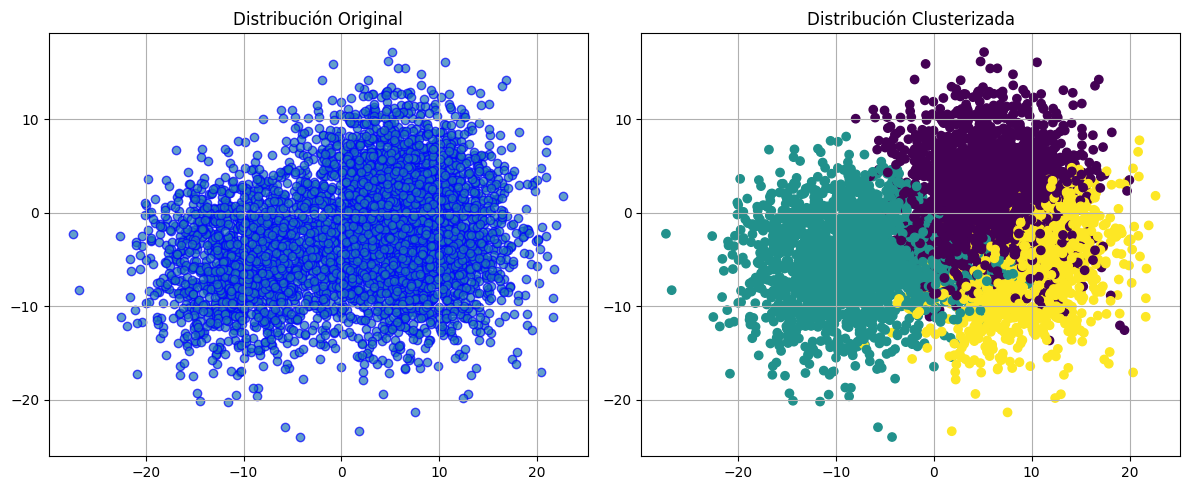

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer gráfico
axes[0].scatter(X[:,0], X[:,1], cmap='red', alpha=0.7, edgecolors='b')
axes[0].grid(True)
axes[0].set_title("Distribución Original")

# Segundo gráfico
axes[1].scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis')
axes[1].grid(True)
axes[1].set_title("Distribución Clusterizada")
print("Número de clusters: ", len(clusters))

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 13.2</p>

<p>Clustering tipo BIRCH.</p>

Ahora puedes agregar el parámetro *n_clusters* al algoritmo para ver su efecto.  
La figura 13.3 muestra tres formaciones diferentes al asignar distintos valores a este parámetro.

Número de clusters: 4
Número de clusters: 5
Número de clusters: 6
Número de clusters: 3516


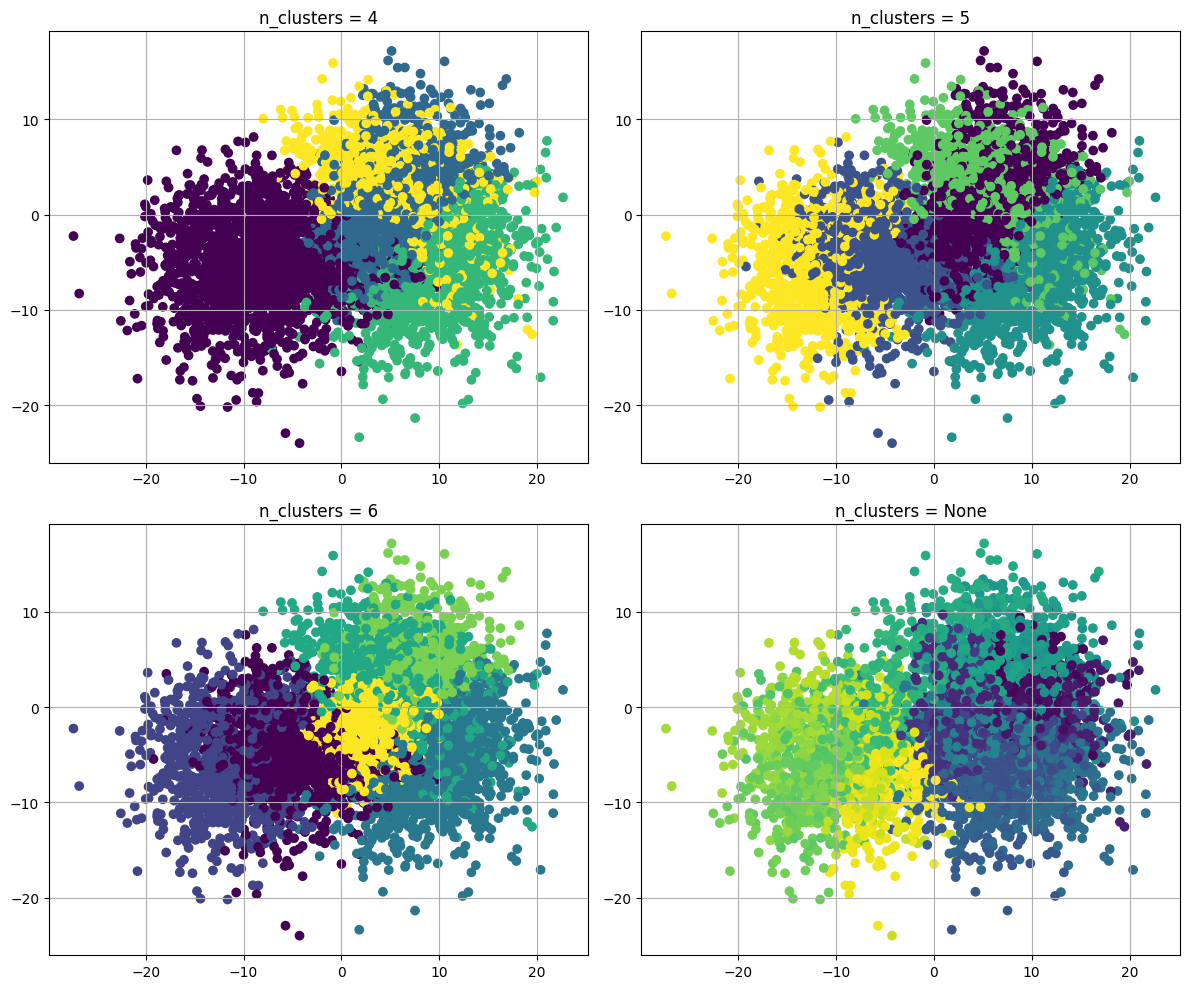

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

n_clusters_list = [4, 5, 6, None]
axes = axes.flatten() 

for ax, n_clusters in zip(axes, n_clusters_list):
    model = Birch(n_clusters=n_clusters)
    model.fit(X)
    pred = model.predict(X)
    clusters = unique(pred)
    
    ax.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis')
    ax.grid(True)
    title = f"n_clusters = {n_clusters}" if n_clusters is not None else "n_clusters = None"
    ax.set_title(title)
    print(f"Número de clusters: {len(clusters)}")

plt.tight_layout()
plt.show()


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 13.3</p>

<p>Clustering *BIRCH* para un número variable de clústers.</p>

Por defecto, el valor asignado a este parámetro es tres. Cuando estableces un valor diferente para este parámetro, el modelo de clustering aglomerativo se ajusta al conjunto de datos con su parámetro *n_clusters* configurado para ser igual al valor especificado. También puedes proporcionar tu propio estimador como parámetro.  

Ahora, veamos el efecto del factor de ramificación (*branching factor*). El valor por defecto de este parámetro es 50. Este valor determina el número máximo de subclusters CF en cada nodo. Durante el entrenamiento, si el número de subclusters excede este valor en algún nodo, se dividirá en dos ramas independientes y el árbol se reformará. La figura 13.4 muestra el efecto del clustering para varios valores del parámetro *branching_factor*.

Número de clusters: 6
Número de clusters: 6
Número de clusters: 6
Número de clusters: 6


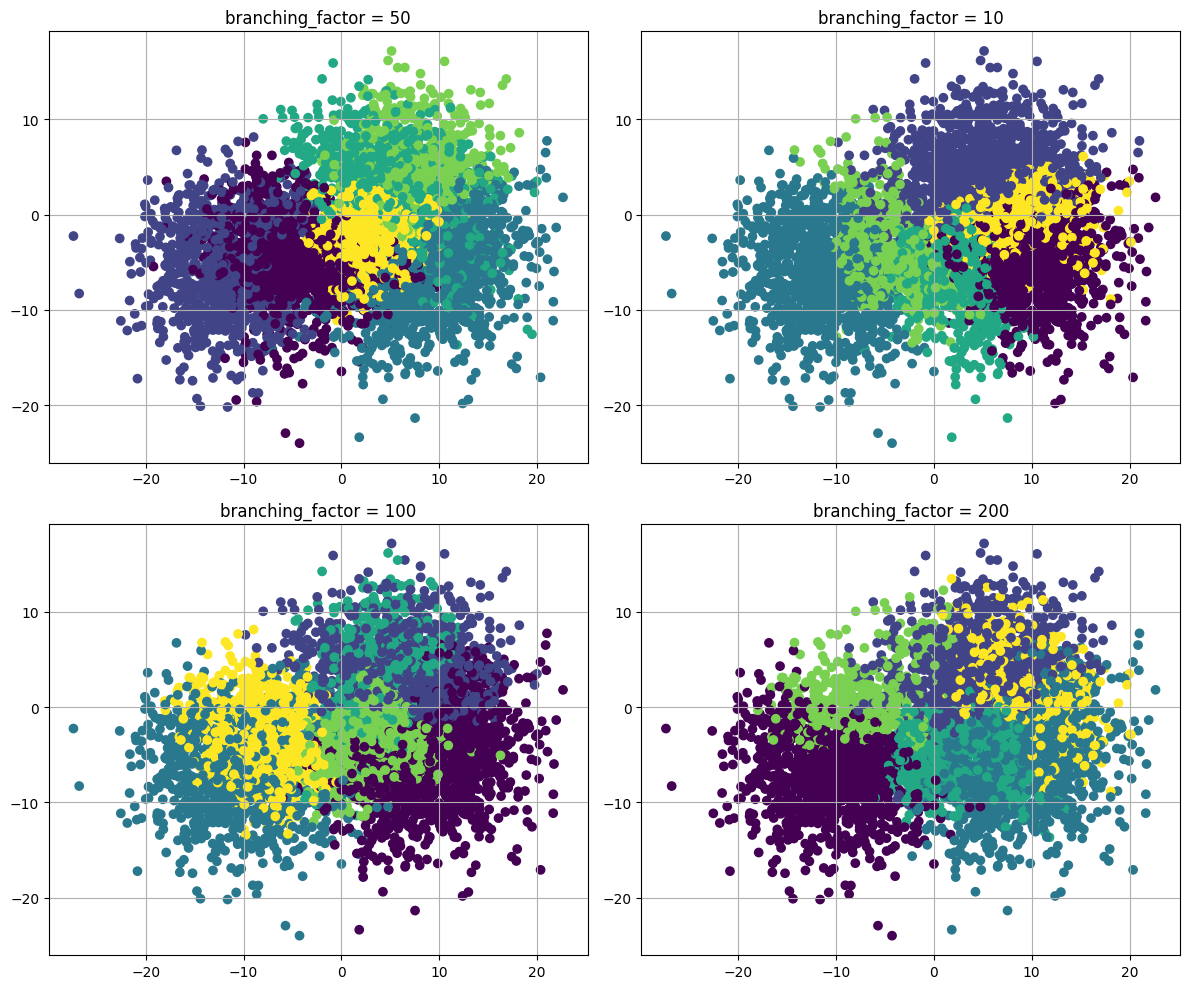

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

branching_factors = [50, 10, 100, 200]

for ax, bf in zip(axes, branching_factors):
    model = Birch(n_clusters=6, branching_factor=bf)
    model.fit(X)
    pred = model.predict(X)
    clusters = unique(pred)
    
    ax.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis')
    ax.grid(True)
    ax.set_title(f"branching_factor = {bf}")
    print(f"Número de clusters: {len(clusters)}")

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 13.4</p>

<p>Clustering *BIRCH* para factores variables de ramificación (*branching*).</p>

A continuación, veamos el efecto del parámetro *threshold*. Este tiene un valor por defecto de 0.5. Este valor decide qué tan cercanos pueden estar los subclusters. El subcluster más cercano siempre debe ser menor que el *threshold*. De lo contrario, se forma un nuevo subcluster. Un valor muy bajo para este parámetro fomenta la división. El efecto de este parámetro puede observarse en la figura 13.5.

Número de clusters: 6
Número de clusters: 6
Número de clusters: 6
Número de clusters: 6


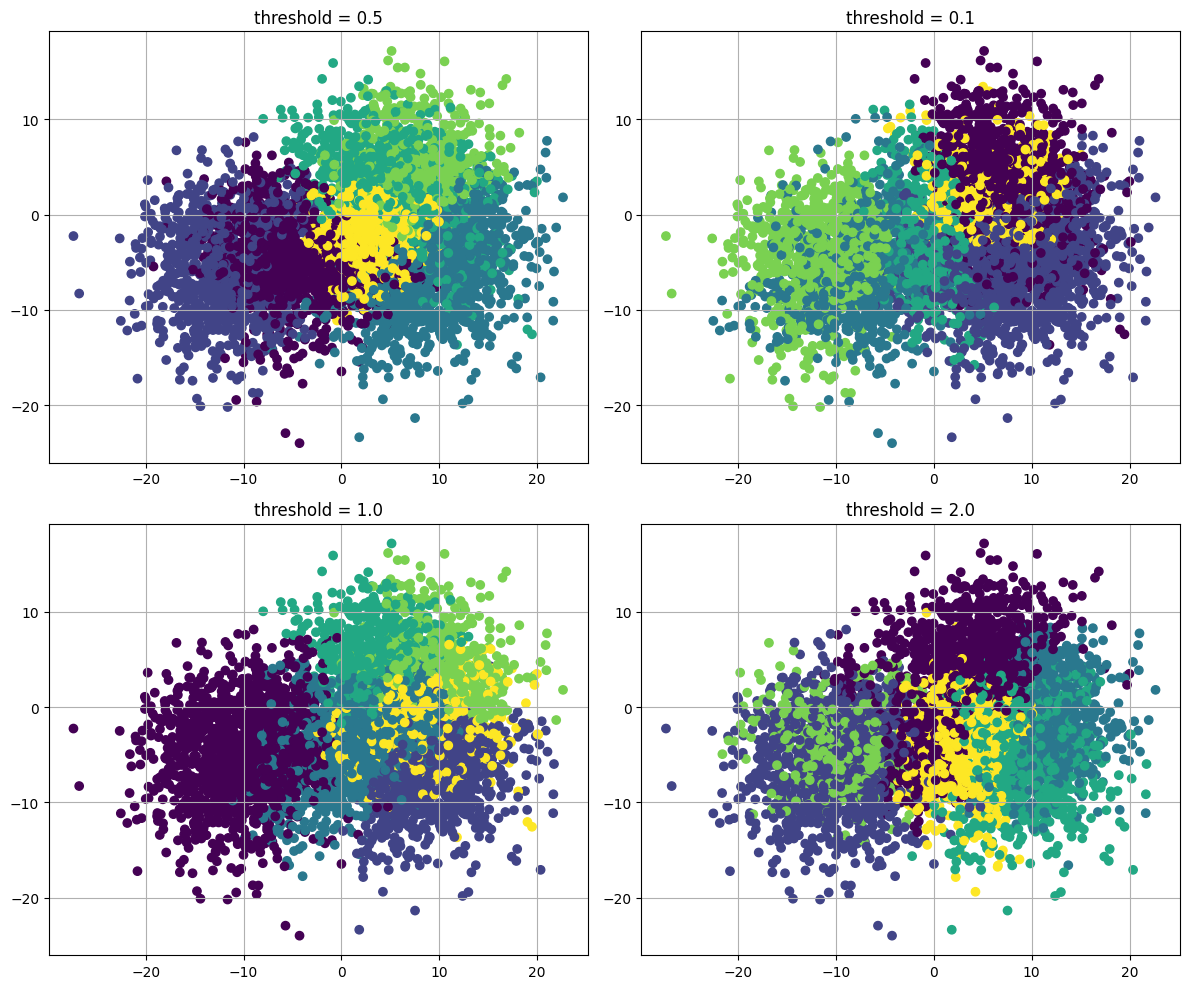

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

threshold_values = [0.5, 0.1, 1.0, 2.0]

for ax, th in zip(axes, threshold_values):
    model = Birch(n_clusters=6, threshold=th)
    model.fit(X)
    pred = model.predict(X)
    clusters = unique(pred)
    
    ax.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis')
    ax.grid(True)
    ax.set_title(f"threshold = {th}")
    print(f"Número de clusters: {len(clusters)}")

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 13.5</p>

<p>Clustering *BIRCH* para valores de *threshold* variables.</p>

Finalmente, se puede decir que el número de clusters, el factor de ramificación y el *threshold* son los tres parámetros que determinan el clustering. Como científico de datos, necesitarás experimentar con estos parámetros hasta que estés satisfecho con los clusters formados en tu conjunto de datos.  

Ahora mostraré el efecto de este algoritmo en un conjunto de datos real. Usaré el mismo conjunto de datos de clientes de un centro comercial que hemos utilizado en proyectos anteriores. La figura 13.6 muestra el clustering realizado sobre los datos de ingreso/gasto.

In [19]:
data = pd.read_csv("content/Mall_Customers.csv")

In [20]:
data["Income"] = data[["Annual Income (k$)"]]
data["Spending"] = data[["Spending Score (1-100)"]]
data = data[["Income", "Spending"]]

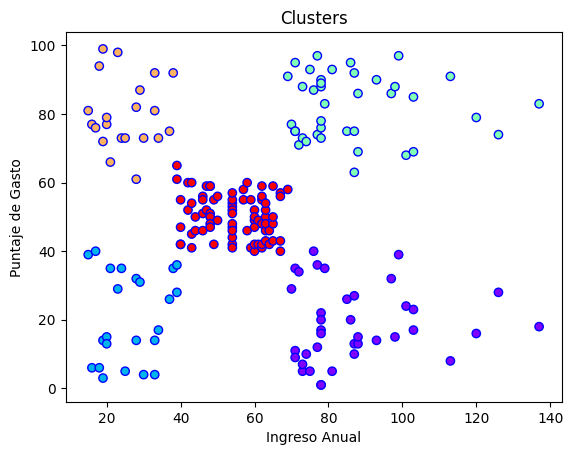

In [22]:
model = Birch(branching_factor=30, n_clusters=5, threshold=2.5)
model.fit(data)
pred = model.predict(data)
plt.scatter(data["Income"], data["Spending"], c=pred, cmap='rainbow', alpha=1.0, edgecolors='b')
plt.title('Clusters')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 13.16</p>

<p>Clustering *BIRCH* en un conjunto de datos de la vida real.</p>

Se observa que el clustering es casi similar al clustering realizado por otros algoritmos, como el clustering aglomerativo y el clustering *mean shift*.

## Resumen  

Para clusterizar conjuntos de datos enormes, la mayoría de los algoritmos que hemos discutido hasta ahora fallan. Una de las principales razones es que no se tienen suficientes recursos de memoria para cargar todo el conjunto de datos en memoria. *BIRCH* resuelve este problema dividiendo el conjunto de datos en unidades más pequeñas, creando una estructura jerárquica en forma de árbol.  

Cada subcluster que se forma en el proceso puede luego ser clusterizado usando cualquiera de los algoritmos anteriores. Como el clustering se realiza de manera incremental, se elimina la necesidad de cargar todo el conjunto de datos en memoria. El algoritmo tiene tres parámetros de entrada: el número de clusters, el factor de ramificación y el *threshold*. En este capítulo, estudiaste el efecto de estos parámetros sobre la formación de clusters. Usar el algoritmo es trivial y podemos aplicarlo fácilmente a conjuntos de datos enormes.  

En el siguiente capítulo, estudiarás *CLARANS* (Clustering LArge datasets with RANdomized Search), que, como su nombre sugiere, también es adecuado para clusterizar conjuntos de datos enormes.